In [15]:
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#EJERCICIO DE SAVIO KERBER

#CORRELACIÓN SP500 VS VIX(indice de volatilidad)

gspc_df = pd.read_csv('^GSPC.csv')
gspc_df['Date'] = pd.to_datetime(gspc_df['Date'])
vix_df = pd.read_csv('^VIX.csv')
vix_df['Date'] = pd.to_datetime(vix_df['Date'])
vix_df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
1254,2020-06-11,30.450001,42.580002,29.490000,40.790001,40.790001,0
1255,2020-06-12,37.680000,44.160000,34.970001,36.090000,36.090000,0
1256,2020-06-15,44.090000,44.439999,34.279999,34.400002,34.400002,0
1257,2020-06-16,34.279999,37.450001,31.730000,33.669998,33.669998,0
1258,2020-06-17,33.279999,35.169998,32.250000,33.470001,33.470001,0


In [16]:
#cut_off_date = max(min(vix_df['Date']),min(gspc_df['Date']))
cut_off_date = '2020-05-01'

gspc_df = gspc_df[gspc_df['Date'] >= cut_off_date]
vix_df = vix_df[vix_df['Date'] >= cut_off_date]

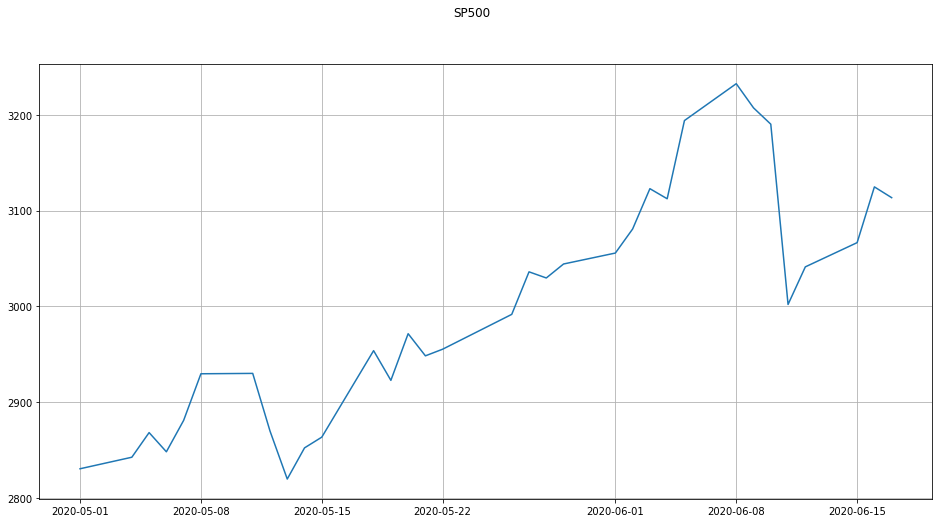

In [17]:
fig = plt.figure(figsize=(16, 8))
plt.plot(gspc_df['Date'],gspc_df['Adj Close'])
plt.suptitle('SP500')
plt.grid()
plt.show()

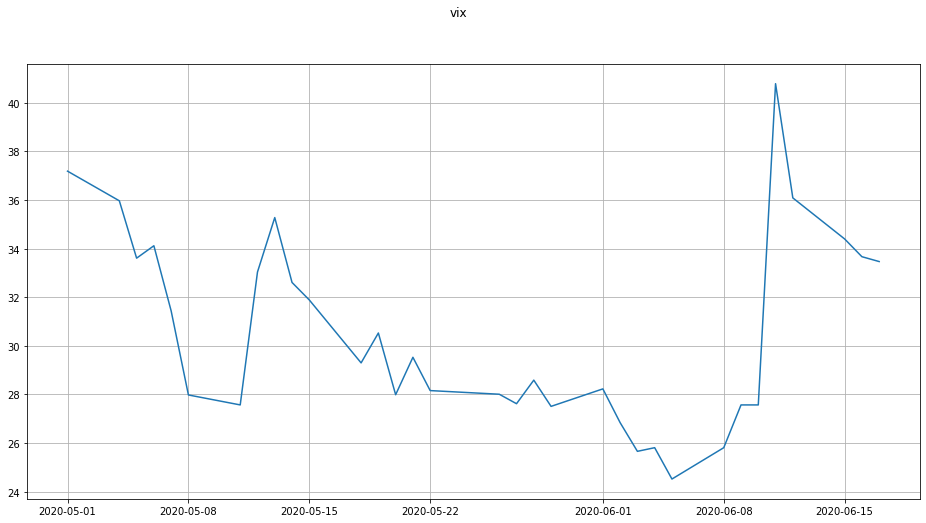

In [18]:
fig = plt.figure(figsize=(16, 8))
plt.plot(vix_df['Date'],vix_df['Adj Close'])
plt.suptitle('vix')
plt.grid()
plt.show()

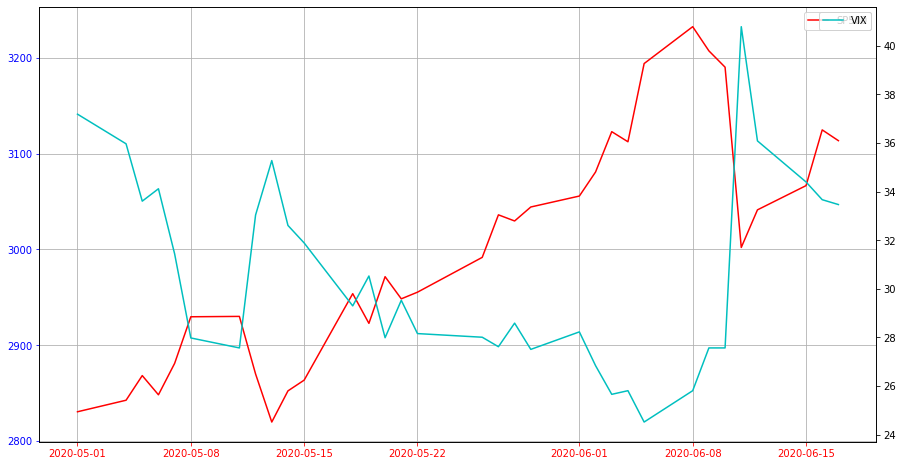

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(gspc_df['Date'],gspc_df['Adj Close'], '-r', label='SP500')
plt.legend()
plt.grid()
ax.tick_params('x', colors='r')

# Get second axis
ax2 = ax.twinx()
#plt.plot(df['c'], 'b', label='Line c')
plt.plot(vix_df['Date'], vix_df['Adj Close'], 'c', label='VIX')
plt.legend()
ax.tick_params('y', colors='b')

In [21]:
# correlation between both
np.corrcoef( vix_df['Adj Close'],  gspc_df['Adj Close'])

array([[ 1.       , -0.5281329],
       [-0.5281329,  1.       ]])

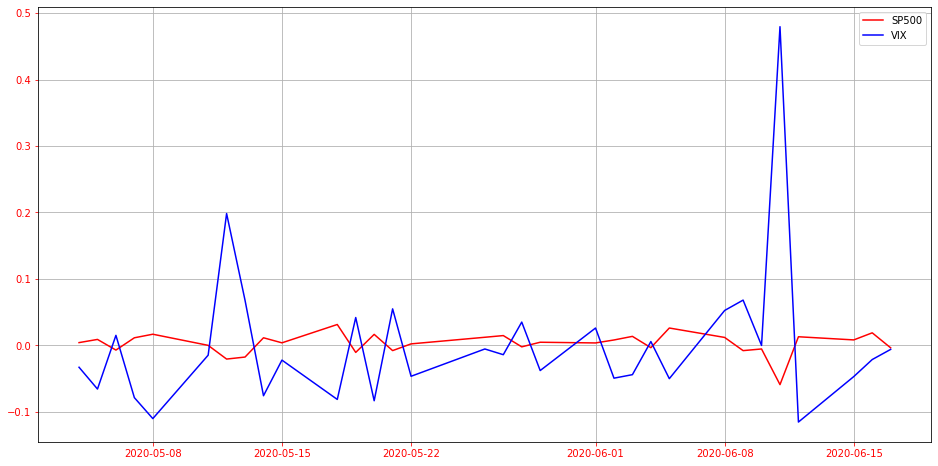

In [22]:
# apply percent change to timeseries data
vix_df['PctChange_Close'] = vix_df['Adj Close'].pct_change().rolling(window=1).mean().values
gspc_df['PctChange_Close'] = gspc_df['Adj Close'].pct_change().rolling(window=1).mean().values


fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(gspc_df['Date'],gspc_df['PctChange_Close'], '-r', label='SP500')
plt.plot(gspc_df['Date'],vix_df['PctChange_Close'], '-b', label='VIX')
plt.legend()
plt.grid()
ax.tick_params('both', colors='r')


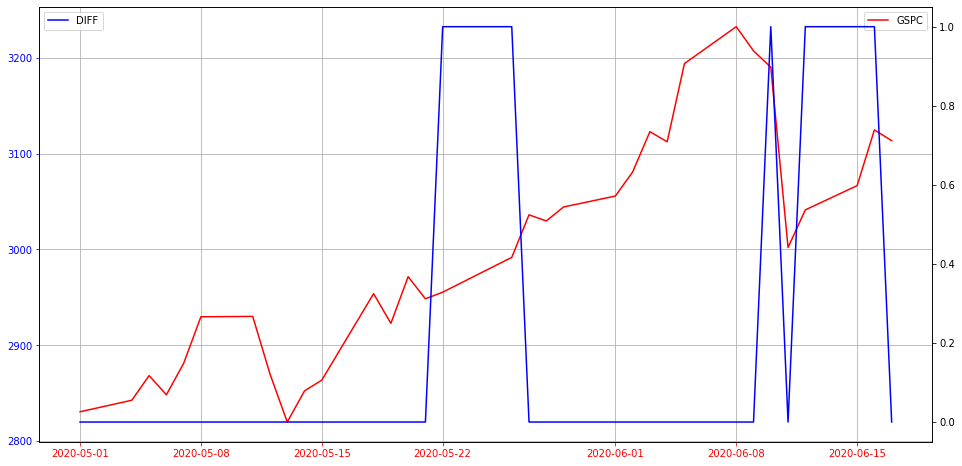

In [23]:
# apply percent change to timeseries data
vix_df['PctChange_Close'] = vix_df['Adj Close'].pct_change().rolling(window=10).mean().values
gspc_df['PctChange_Close'] = gspc_df['Adj Close'].pct_change().rolling(window=10).mean().values


 
gspc_df['together'] = [1 if (v>0 and g>0) else -1 if (v<0 and g<0)  else 0 for v,g in 
                       zip(vix_df['PctChange_Close'].values, gspc_df['PctChange_Close'].values)]

 
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(gspc_df['Date'],gspc_df['Adj Close'], '-r', label='GSPC')
plt.legend()
plt.grid()
ax.tick_params('x', colors='r')

 

# Get second axis
ax2 = ax.twinx()
#plt.plot(df['c'], 'b', label='Line c')
plt.plot(gspc_df['Date'],gspc_df['together'], '-b', label='DIFF')

plt.legend()
ax.tick_params('y', colors='b')

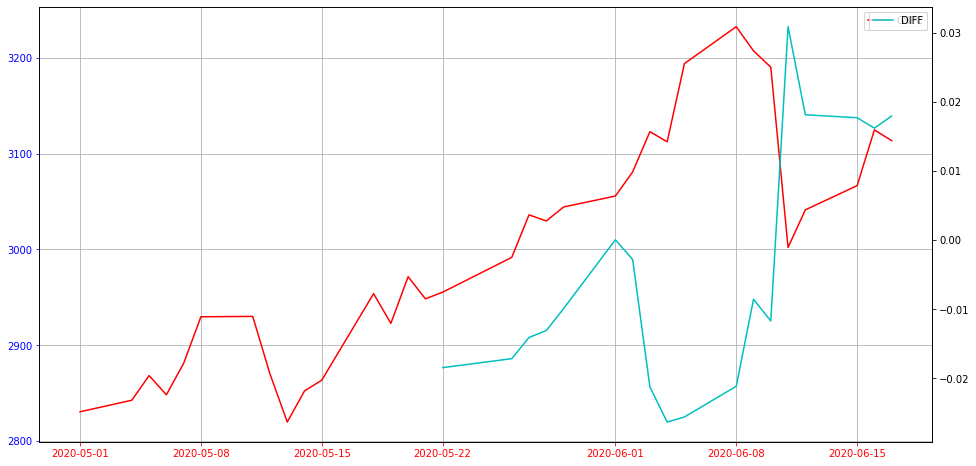

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(gspc_df['Date'],gspc_df['Adj Close'], '-r', label='GSPC')
plt.legend()
plt.grid()
ax.tick_params('x', colors='r')

vix_df['pct_diff'] = (vix_df['Adj Close'].pct_change().values - gspc_df['Adj Close'].pct_change().values)
 

# Get second axis
ax2 = ax.twinx()
#plt.plot(df['c'], 'b', label='Line c')
plt.plot(gspc_df['Date'], vix_df['pct_diff'].rolling(window=15).mean().values, 'c', label='DIFF')
plt.legend()
ax.tick_params('y', colors='b')


In [1]:
#obs:los datos son descargados y de cierre diario apenas, quedaria pendiente alguna forma de actualizar intradiario
# y la automatizacion de este proceso tambien
#substiuir la descarga de datos por alguna conexion a API